# Import Libraries

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/my_dataset

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/my_dataset/

In [ ]:
!unzip archive.zip

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay


# Load Data

In [ ]:
df = pd.read_csv("Covid Data.csv")
df

# Data Information, Cleaning & Visualization

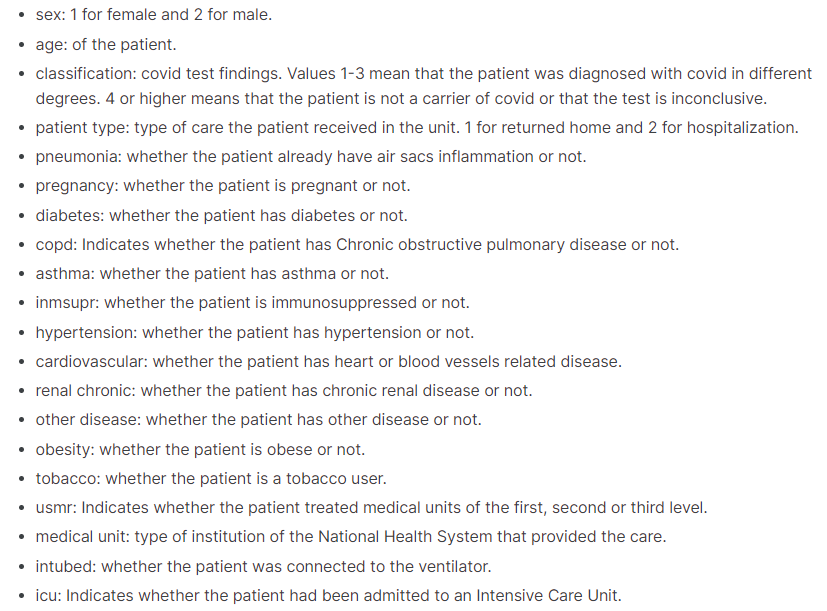

In [ ]:
df.drop(["DATE_DIED"], axis = 'columns',  inplace=True)

In [ ]:
df.info()

In [ ]:
df.size

In [ ]:
df.shape

In [ ]:
df.describe().T

In [ ]:
df.CLASIFFICATION_FINAL.value_counts()

In [ ]:
df_corr = df.corr()
df_corr

In [ ]:
df.columns

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(df_corr, cmap = 'viridis', annot = True)

In [ ]:
plt.figure(figsize = (20, 25))

for i in range(len(df.columns)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'blue')
    plt.grid()

## **Note**

### *As observed from the above analysis, The "CLASSIFFICATION_FINAL" attribute has values ranging from 1 to 7. But for our ease of action, we are converting the limit starting from 0 to 6.*

In [ ]:
df['CLASIFFICATION_FINAL'] = df.CLASIFFICATION_FINAL.apply(lambda x: x-1)

In [ ]:
df.CLASIFFICATION_FINAL.value_counts()

In [ ]:
df.SEX.value_counts()

In [ ]:
plt.figure(figsize = (15, 11))
plt.title("Gender")
plt.pie(df.SEX.value_counts(), explode = (0.05, 0.05), labels = ['Male', 'Female'],autopct = '%1.2f%%')
plt.legend(df.SEX.value_counts(), loc = 'lower left', title = 'Intensity Level')

In [ ]:
plt.figure(figsize = (15, 11))
plt.title("Classification")
plt.pie(df.CLASIFFICATION_FINAL.value_counts(), explode = (0.05, 0.05, 0.05, 0.05, 0.1, 0.3, 0.5), labels = ['6', '2', '5', '4', '0', '3', '1'],autopct = '%1.2f%%')
plt.legend(df.CLASIFFICATION_FINAL.value_counts(), loc = 'lower left', title = 'Intensity Level')

In [ ]:
sns.FacetGrid(df, col = 'SEX', height = 4)
sns.distplot(df['CLASIFFICATION_FINAL'])

# Train & Test Split

In [ ]:
x = df.loc[:, df.columns.drop('CLASIFFICATION_FINAL')]
x = StandardScaler().fit_transform(x)
x

In [ ]:
y = df['CLASIFFICATION_FINAL'].values
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

# Logistic Regression

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

In [ ]:
y_pred_lr = model_lr.predict(x_test)

In [ ]:
perform(y_pred_lr)

In [ ]:
filename = 'Covid_Classification_lr.h5'
pickle.dump(model_lr, open(filename, 'wb'))

# XGBoost Classifier

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)

In [ ]:
y_pred_xgb = model_xgb.predict(x_test)

In [ ]:
perform(y_pred_xgb)

In [ ]:
filename = 'Covid_Classification_xgb.h5'
pickle.dump(model_xgb, open(filename, 'wb'))

# XGBRF Classifier

In [ ]:
model_xgbrf = XGBRFClassifier()
model_xgbrf.fit(x_train, y_train)

In [ ]:
y_pred_xgbrf = model_xgbrf.predict(x_test)

In [ ]:
perform(y_pred_xgbrf)

In [ ]:
filename = 'Covid_Classification_xgbrf.h5'
pickle.dump(model_xgbrf, open(filename, 'wb'))

# Decision Tree

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

In [ ]:
y_pred_dt = model_dt.predict(x_test)

In [ ]:
perform(y_pred_dt)

In [ ]:
filename = 'Covid_Classification_dt.h5'
pickle.dump(model_dt, open(filename, 'wb'))

# Random Forest

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
perform(y_pred_rf)

In [ ]:
filename = 'Covid_Classification_rf.h5'
pickle.dump(model_rf, open(filename, 'wb'))

# ADABoost Classifier

In [ ]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

In [ ]:
y_pred_ada = model_ada.predict(x_test)

In [ ]:
perform(y_pred_ada)

In [ ]:
filename = 'Covid_Classification_ada.h5'
pickle.dump(model_ada, open(filename, 'wb'))

# ExtraTrees Classifier

In [ ]:
model_etc = ExtraTreesClassifier()
model_etc.fit(x_train, y_train)

In [ ]:
y_pred_etc = model_etc.predict(x_test)

In [ ]:
perform(y_pred_etc)

In [ ]:
filename = 'Covid_Classification_etc.h5'
pickle.dump(model_etc, open(filename, 'wb'))

# GradientBoosting Classifier

In [ ]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train, y_train)

In [ ]:
y_pred_gbc = model_gbc.predict(x_test)

In [ ]:
perform(y_pred_gbc)

In [ ]:
filename = 'Covid_Classification_gbc.h5'
pickle.dump(model_gbc, open(filename, 'wb'))

# MLP

In [ ]:
model_mlp = MLPClassifier()
model_mlp.fit(x_train, y_train)

In [ ]:
y_pred_mlp = model_mlp.predict(x_test)

In [ ]:
perform(y_pred_mlp)

In [ ]:
filename = 'Covid_Classification_mlp.h5'
pickle.dump(model_mlp, open(filename, 'wb'))

## **Conclusion**

### *Though we have applied machine learning techniques to classify COVID and gathered an accuracy of ~55%, but Doctor's decision will be considered and treated as final, as he/she takes that decision based on certain parameters, comorbidities and experience gathered over years.*

<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://cdn.dribbble.com/users/126069/screenshots/2253470/screengif7.gif" width="480" height="200"></p>